# Winter 2022 Data Science Intern Challenge 



## Question 1: 

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. 
We want to do some analysis of the average order value (AOV). 
When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

    Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
    What metric would you report for this dataset?
    What is its value?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [2]:
orders = pd.read_csv('./DataSet.csv')
orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
orders.shape

(5000, 7)

In [4]:
orders.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Thinking about what could be going wrong with our calculation.
So the given AOV was calculated by simply computing the mean value for **order_amount** column. But if we take a look at the **total_items** column we can see that entries in **order_amount** is not always a value for single sneaker. For example on the first row the **order_amount** column contains the value for 2 sneakers as mentioned in **total_items** column. 

In [11]:
# Applied Calculation Method 
AOV=orders['order_amount'].sum() / len(orders) 
print('The Average Order Value (AOV) value was incorrectly calculated as the ratio of total order amount and number of orders.\nAverage Order Value (AOV) is ${0:.2f}'.format(AOV))

#Or

AOV=orders['order_amount'].mean()
print('\nThis Average Order Value (AOV) can also be represented as the mean of order amount.\nAOV is ${0:.2f}'.format(AOV))

The Average Order Value (AOV) value was incorrectly calculated as the ratio of total order amount and number of orders.
Average Order Value (AOV) is $3145.13

This Average Order Value (AOV) can also be represented as the mean of order amount.
AOV is $3145.13


### Equations for **incorrect Average Order Value (AOV)** is

\begin{equation}
AOV = \frac{Total Order Amount}{Number of Orders}
\end{equation}
or
\begin{equation}
AOV = mean(Order Amount)
\end{equation}

### Equations for **correct Average Order Value (AOV)** is

\begin{equation}
AOV = \frac{Total Order Amount}{Total Order Items}
\end{equation}

In [12]:
print("The actual value of AOV is", orders["order_amount"].sum() / orders["total_items"].sum())

The actual value of AOV is 357.92152221412965



Understand the dependency among different variables. We can see that order_amount columns have significant dependency on total_items
---



<AxesSubplot:>

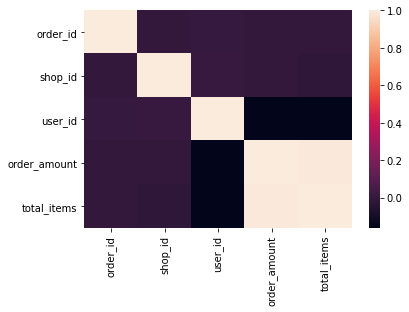

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
corr = orders.corr()
sns.heatmap(corr)

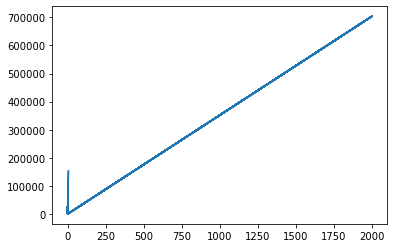

In [14]:
plt.plot(orders['total_items'], orders['order_amount'])

<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

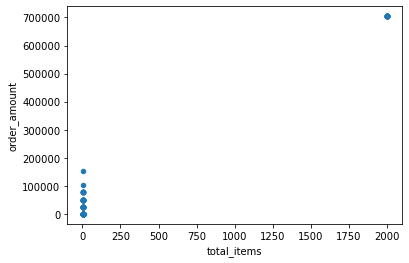

In [15]:
orders.plot.scatter(y='order_amount', x='total_items')

## This clearly indicates that the data has higher outline and normal pattern. 
## Initialy we can try removing the outliers.

Z-score, bootstrapping, abd windsorized estimators methods can be useful for dealing with outliers.There are couple of orders for total_item 2000, where the rest of the orders are for total_item < 10. These few high end data point are giving a wrong impression of the dataset. Therefore, AOV is clearly not the correct metrics for this dataset. Instead we can use median to ignore the impact for the high outline data.  

In [16]:
orders.sort_values(by='order_amount', ascending=False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


So there are 17 items is creating a high end outline for the rest 99% (100-(17/5000)*100) data the average  **total_items** is 2 and **order_value** is aproxmately 300.

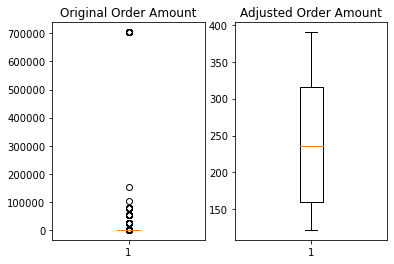

In [25]:
#orders_adjusted = orders['order_amount'][orders['order_amount'].bewteen(orders['order_amount'].quantile(.05), orders['order_amount'].quantile(.95))] 
total_amounts_adjusted = orders['order_amount'][orders['order_amount'].between(orders['order_amount'].quantile(.05), orders['order_amount'].quantile(.75))] 


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(orders['order_amount'])
ax1.set_title('Original Order Amount')

ax2.boxplot(total_amounts_adjusted)
ax2.set_title('Adjusted Order Amount')
plt.show()

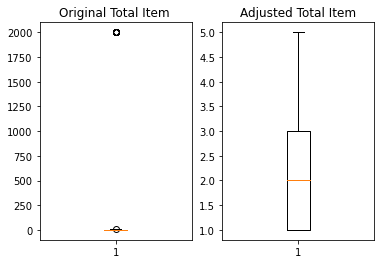

In [34]:
total_items_adjusted = orders['total_items'][orders['total_items'].between(orders['total_items'].quantile(.05), orders['total_items'].quantile(.99))] 
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(orders['total_items'])
ax1.set_title('Original Total Item ')

ax2.boxplot(total_items_adjusted)
ax2.set_title('Adjusted Total Item')
plt.show()

Outlier orders are each of 2000 total_items which influencing the AOV to be computed as a higher end value. 
We can compute the write metrics for the data by two ways 


1.   Compute median instead of AOV
2.   Adding a new column to compute the order_value per item by simply dividing the value of **order_value** column by the value of **total_items** columns for each row
3. Using Z-score




1. Compute Median
---
The median value for** order_value** per item can be 284.0


In [26]:
orders.median()

order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64


2. Normalizing order_value column
---



In [27]:
orders['order_amount_per_item'] = orders['order_amount']/orders['total_items']
orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [28]:
orders.sort_values(by='order_amount', ascending=False).head(30)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_per_item
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00,352.0


In [29]:
orders.describe()

,order_id,shop_id,user_id,order_amount,total_items,order_amount_per_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


#The correct AOV for normalize dataset is **387.742800** which is the mean value for **order_amount_per_item**


3. Using Z-score
---


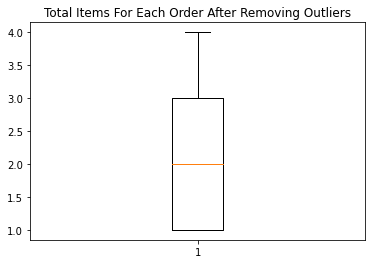

The modified AOV is 372.7100853619981


In [32]:
Q1 = orders['total_items'].quantile(0.25)
Q2 = orders['total_items'].quantile(0.5)
Q3 = orders['total_items'].quantile(0.75)
IQR = Q3 - Q1    #IQR represents interquartile range. 
filter=orders[(orders["total_items"]<(Q2 + IQR * 1.5))&(orders["total_items"]>(Q2 - IQR * 1.5))]
plt.title("Total Items For Each Order After Removing Outliers")
plt.boxplot(filter["total_items"])
plt.show()
print("The modified AOV is", filter["order_amount"].sum() / filter["total_items"].sum())

### What metric would you report for this dataset?
The above analysis can conclude to matrix that is suitable for AOV calculation 
1. Without the outliers ----- Valu calculted 372.71
2. With a extra column for per item amount calculation ----- Valu calculted 387.74
3. Ration of total total order item and amount ----- Valu calculted 357.92

### What is its value?
The modified AOV lies between 357.92 to 387.74